# Movies Correlation Project

#### Import the neccesary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(12,6)})

#### Load in dataset

In [2]:
df = pd.read_csv("movies.csv")

#### Data Exploration

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.shape

(7668, 15)

#### Check for missing data

In [6]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

#### Clean Data. Apparently, there are missing values

In [7]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


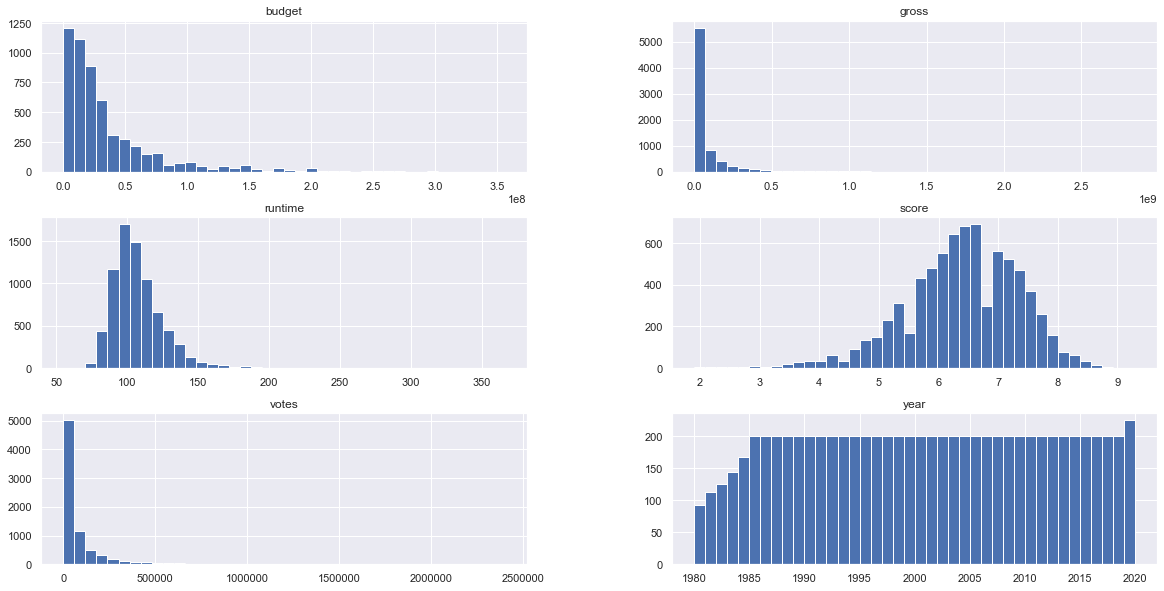

In [8]:
# Check the distribution of Quantitative values
df.hist(bins=40, figsize=(20,10))
plt.ticklabel_format(style="plain")

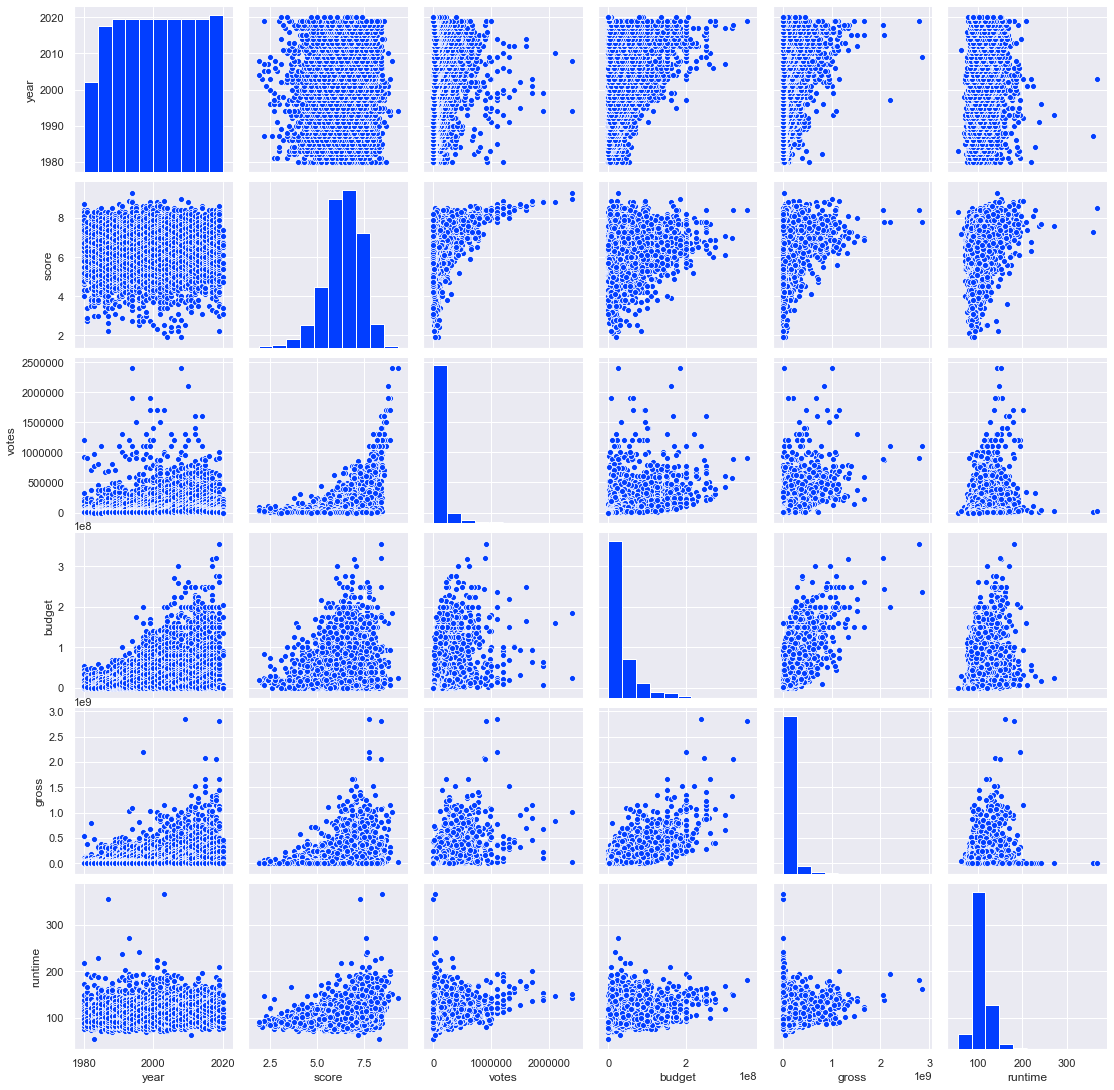

In [10]:
sns.pairplot(df)

#### Replace Null Values

In [10]:
#Replace null values under the rating column with "Unknown"
#df.dropna(subset=["rating"], how="all", inplace=True)
df["rating"].fillna(value="Unknown", inplace=True)
df.dropna(subset=["released"], how="all", inplace=True)
df["votes"].fillna(value=(df["votes"].mean()), inplace=True)
df["score"].fillna(value=(df["score"].mean()), inplace=True)
df["writer"].fillna(value="Unknown", inplace=True)
df.dropna(subset=["star"], how="all", inplace=True)
df.dropna(subset=["country"], how="all", inplace=True)
df["budget"].fillna(value=(df["budget"].median()), inplace=True)
df["gross"].fillna(value=(df["gross"].median()), inplace=True)
df["company"].fillna(value="Unknown", inplace=True)
df["runtime"].fillna(value=(df["score"].median()), inplace=True)

In [11]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

#### Data transformation

In [12]:
# Convert columns (budget & gross) to intergers
df["gross"] = df["gross"].astype("int64")
df["budget"] = df["budget"].astype("int64")

#### Data visualizatiton

Text(0.5, 1.0, 'BUDGET IN MILLION VS GROSS IN BILLIONS')

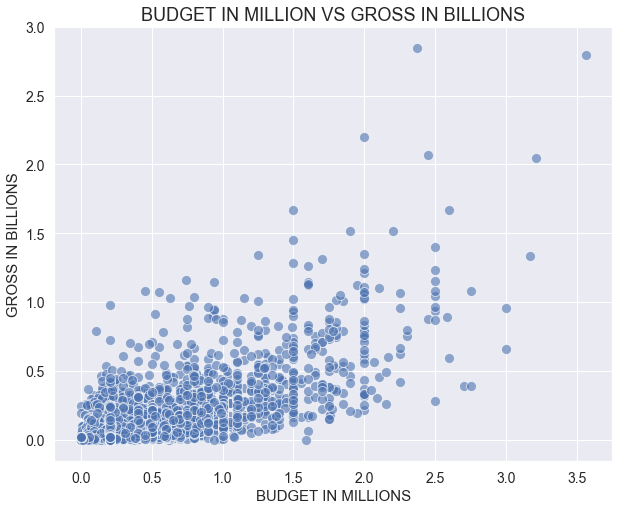

In [89]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x=df["budget"]/10**8, y=df["gross"]/10**9, s=100, edgecolors="w", alpha=0.6,)
plt.xlabel("BUDGET IN MILLIONS", size=15)
plt.ylabel("GROSS IN BILLIONS", size=15)
plt.tick_params(axis="x", labelsize = 14)
plt.tick_params(axis="y", labelsize = 14)
plt.title("BUDGET IN MILLION VS GROSS IN BILLIONS", size=18)

Text(0.5, 1.0, 'BUDGET IN MILLIONS VS VOTES')

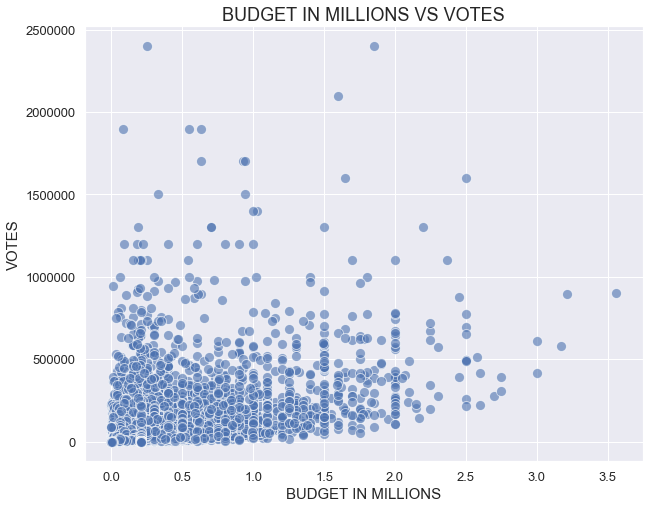

In [90]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x=df["budget"]/10**8, y=df["votes"], s=100, edgecolors="w", alpha=0.6,)
plt.xlabel("BUDGET IN MILLIONS", size=15)
plt.ylabel("VOTES", size=15)
plt.tick_params(axis="x", labelsize = 13)
plt.tick_params(axis="y", labelsize = 13)
plt.title("BUDGET IN MILLIONS VS VOTES", size=18)

Text(0.5, 0, 'GROSS IN BILLIONS')

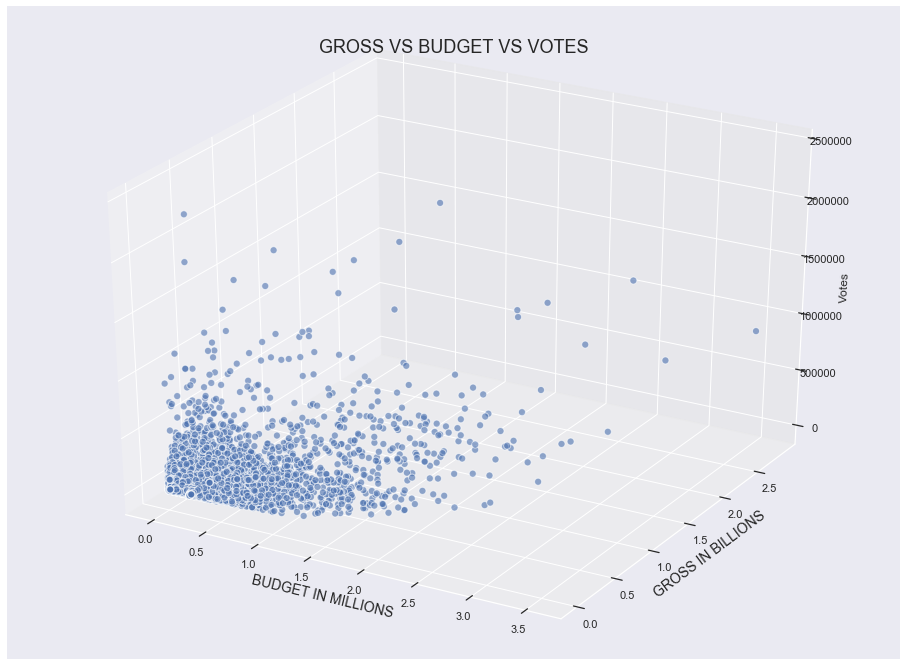

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')

x_scale = df["budget"]/10**8
y_scale = df["gross"]/10**9
z_scale = df["votes"]
ax.scatter(x_scale, y_scale, z_scale, s=50, alpha=0.6, edgecolors="white")

ax.set_xlabel('Gross')
ax.set_ylabel('Budget')
ax.set_zlabel('Votes')
plt.title("GROSS VS BUDGET VS VOTES", size=18)
plt.xlabel("BUDGET IN MILLIONS", size=14)
plt.ylabel("GROSS IN BILLIONS", size=14)

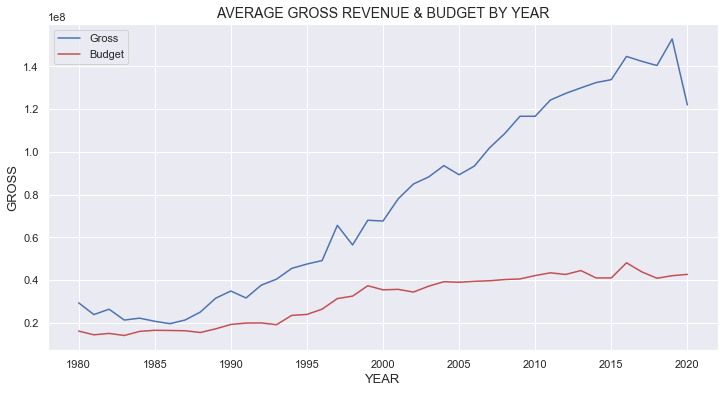

In [101]:
trend_df = df.groupby("year").mean().reset_index()
budget_df = df.groupby("year").mean().reset_index()
vote_df = df.groupby("year").mean().reset_index()
sns.lineplot(x="year", y=trend_df["gross"], data=trend_df, label="Gross", color="b")
sns.lineplot(x="year", y=budget_df["budget"], data=budget_df, label="Budget", color="r")
plt.title('AVERAGE GROSS REVENUE & BUDGET BY YEAR', size=14)
plt.xlabel("YEAR", size=13)
plt.ylabel("GROSS", size=13)
plt.legend(loc=0)

Text(106.125, 0.5, 'GROSS IN BLLIONS')

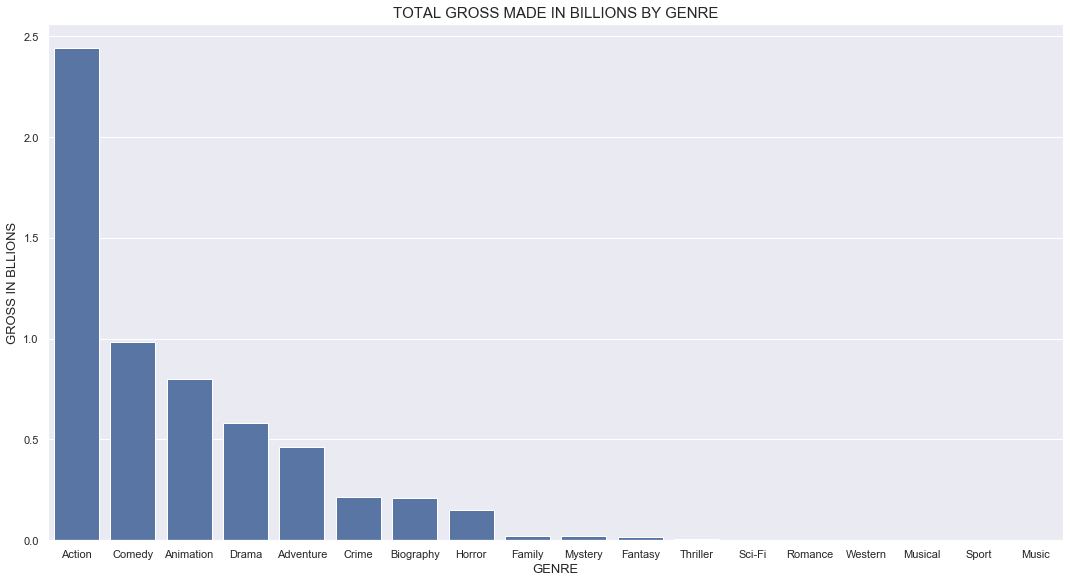

In [59]:
genre_df = df.groupby("genre").sum().reset_index().sort_values("gross", ascending=False)
fig = plt.figure(figsize=(15,8))
sns.barplot(x="genre", y=genre_df["gross"]/10**11, data=genre_df, color="b")
plt.tight_layout()
plt.title("TOTAL GROSS MADE IN BILLIONS BY GENRE", size=15)
plt.xlabel("GENRE", size=13)
plt.ylabel("GROSS IN BLLIONS", size=13)

Text(106.125, 0.5, 'GROSS IN BLLIONS')

<Figure size 360x360 with 0 Axes>

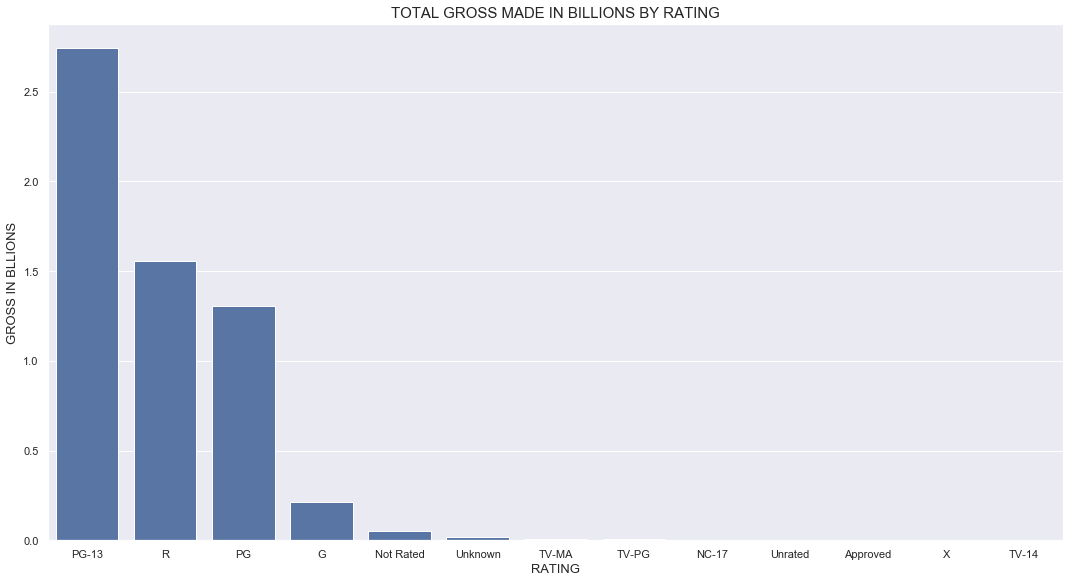

In [74]:
fig = plt.figure(figsize=(5,5))
genre_df = df.groupby("rating").sum().sort_values(by="gross", ascending=False).reset_index()
fig = plt.figure(figsize=(15,8))
sns.barplot(x="rating", y=genre_df["gross"]/10**11, data=genre_df, color="b")
plt.tight_layout()
plt.title("TOTAL GROSS MADE IN BILLIONS BY RATING", size=15)
plt.xlabel("RATING", size=13)
plt.ylabel("GROSS IN BLLIONS", size=13)

In [203]:
#Discount count of countries
df["country"].nunique()

59

In [204]:
#Countries
df["country"].unique()

array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Libya', 'Italy', 'Soviet Union', 'France',
       'Hong Kong', 'South Korea', 'Sweden', 'Spain', 'Mexico',
       'Switzerland', 'Netherlands', 'New Zealand', 'Philippines',
       'Israel', 'Japan', 'Hungary', 'Brazil', 'Yugoslavia', 'Argentina',
       'Taiwan', 'Ireland', 'Denmark', 'Germany', 'Iran', 'China',
       'Belgium', 'Austria', 'Portugal', 'Vietnam',
       'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic',
       'Norway', 'India', 'Jamaica', 'Aruba', 'Thailand', 'Colombia',
       'Romania', 'United Arab Emirates', 'Indonesia', 'Turkey', 'Serbia',
       'Poland', 'Kenya', 'Finland', 'Iceland', 'Chile', 'Panama',
       'Malta', 'Lebanon'], dtype=object)

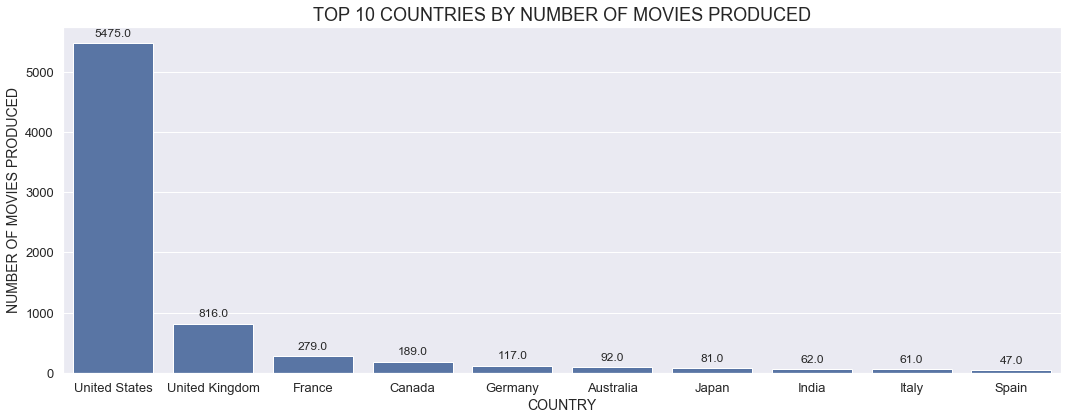

In [86]:
#TOP 10 COUNTRIES BY NUMBER OF MOVIES PRODUCED
fig = plt.figure(figsize=(15,6))
country_df = df["country"].value_counts()
country_df = pd.DataFrame(country_df.head(10))
country_df = country_df.reset_index()
splot = sns.barplot(x="index", y="country", data=country_df, color="b")
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x()+p.get_width()/2.,p.get_height()), 
                   ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title("TOP 10 COUNTRIES BY NUMBER OF MOVIES PRODUCED", size=18)
plt.xlabel("COUNTRY", size=14)
plt.ylabel("NUMBER OF MOVIES PRODUCED", size=14)
plt.tick_params(axis="x", labelsize = 13)
plt.tick_params(axis="y", labelsize = 13)
plt.tight_layout()

In [87]:
#TOP 20 Movies by gross 
df.groupby("name").sum().sort_values("gross", ascending=False).head(20)

,year,score,votes,budget,gross,runtime
name,,,,,,
Avatar,2009,7.8,1100000.0,237000000,2847246203,162.0
Avengers: Endgame,2019,8.4,903000.0,356000000,2797501328,181.0
The Lion King,4013,15.4,1192000.0,305000000,2754448457,206.0
Titanic,1997,7.8,1100000.0,200000000,2201647264,194.0
Star Wars: Episode VII - The Force Awakens,2015,7.8,876000.0,245000000,2069521700,138.0
Avengers: Infinity War,2018,8.4,897000.0,321000000,2048359754,149.0
Beauty and the Beast,4008,15.1,707000.0,185000000,1689402145,213.0
Jurassic World,2015,7.0,593000.0,150000000,1670516444,124.0
Aladdin,4011,14.9,621000.0,211000000,1554744172,218.0


#### Correlation Matrix uisng Pearson's Method

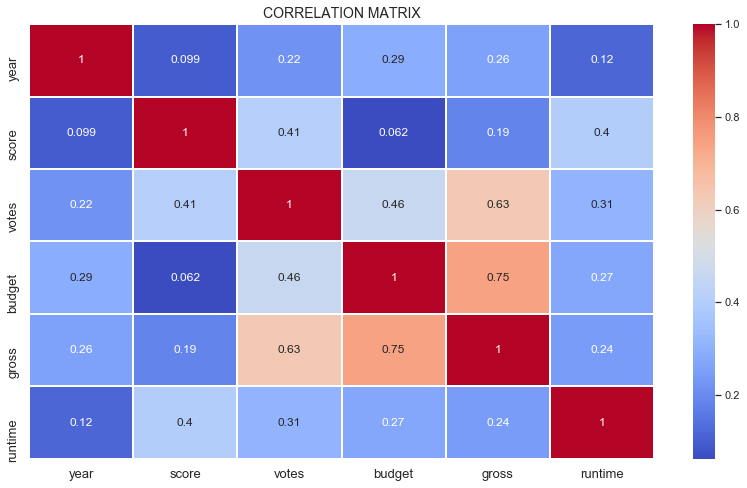

In [88]:
fig = plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=1)
plt.title("CORRELATION MATRIX", size=14)
plt.tick_params(axis="x", labelsize = 13)
plt.tick_params(axis="y", labelsize = 13)